In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import stats

def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    #for value in list1:

    return lst3

#input una dataframe output density dataframe de distribuciones
#data: Pandas dataframe
# x_ax: the column witch contains the main random variable
# frequency=True: True if you only need to count the number of times, False if volume is need 
# y_ax=None, 
# bins=100
def distribution_df(data,x_ax,frequency=True,y_ax=None, bins=100):
    data=data.round(6)
    minimo=data[x_ax].min()
    maximo=data[x_ax].max()
    rango=maximo-minimo
    interval_size=rango/bins
    Ranges=[]
    #Index_DF lista con el punto medio del intervalo de frequencia
    #Index_DF=[]
    dist_data=[]
    
    for k in range(bins+1):    
        Ranges.append(round(minimo+k*interval_size,7))
        #Index_DF.append(round(minimo+(2*k+1)*interval_size/2,7))
    count=1
    for i in Ranges:  
        #a=set(data[i<=data]).intersection(set(data[data<(i+count*interval_size)]))
        if count==bins:
            # a=intersection(data[i<=data[x_ax]][x_ax].tolist(),data[data[x_ax]<=(i+interval_size)][x_ax].tolist())
            a=data[i<=data[x_ax]][data[x_ax]<=(i+interval_size)]
        else:
            # a=intersection(data[i<=data[x_ax]][x_ax].tolist(),data[data[x_ax]<(i+interval_size)].tolist())
            a=data[i<=data[x_ax]][data[x_ax]<(i+interval_size)]
        # a=list(a)

        if frequency==True:
            dist_data.append(len(a))
            count+=1
        elif frequency!=True:
            dist_data.append(a[y_ax].sum())
            count+=1
    

    dist=pd.DataFrame({"Index":Ranges,f"Frequencia {y_ax}":dist_data})
    dist[f"Frequencia {y_ax} relativa"]=dist[f"Frequencia {y_ax}"]/np.sum(dist_data)
    dist["Interval Size"]=interval_size
    dist["V*P"]=dist[f"Frequencia {y_ax} relativa"]*dist["Index"]
    dist["V*P^2"]=dist[f"Frequencia {y_ax} relativa"]*dist["Index"]**2

    return dist

def frequency_inside(inf,sup,dist_df):
    
    df=dist_df[dist_df["Index"]>inf][dist_df["Index"]<sup]
    Fr=df.iloc[:,2]
    return Fr.sum() 



In [5]:
test=pd.read_xml("2016\2016W1.xml")
test

XMLSyntaxError: Start tag expected, '<' not found, line 1, column 1 (<string>, line 1)

In [4]:
#2015 s41 
S_2015W42=pd.read_excel("2015/prev failed opt/2015W42.xlsx",index_col=0)
S_2015W41=S_2015W41.drop(columns=["Custom"])
S_2015W41["RR ratio"]=S_2015W41["TpFactor"]/S_2015W41["SlFactor"]
S_2015W41["Profit %"]=(S_2015W41["Profit"]/10000)*100
#2015 s42 
S_2015W42=pd.read_excel("2015/2015W42.xlsx",index_col=0)
S_2015W41=S_2015W41.drop(columns=["Custom"])
S_2015W41["RR ratio"]=S_2015W41["TpFactor"]/S_2015W41["SlFactor"]
S_2015W41["Profit %"]=(S_2015W41["Profit"]/10000)*100
#2015 s43 
S_2015W42=pd.read_excel("2015/2015W42.xlsx",index_col=0)
S_2015W41=S_2015W41.drop(columns=["Custom"])
S_2015W41["RR ratio"]=S_2015W41["TpFactor"]/S_2015W41["SlFactor"]
S_2015W41["Profit %"]=(S_2015W41["Profit"]/10000)*100
#2015 s44 
S_2015W42=pd.read_excel("2015/2015W42..xlsx",index_col=0)
S_2015W41=S_2015W41.drop(columns=["Custom"])
S_2015W41["RR ratio"]=S_2015W41["TpFactor"]/S_2015W41["SlFactor"]
S_2015W41["Profit %"]=(S_2015W41["Profit"]/10000)*100


FileNotFoundError: [Errno 2] No such file or directory: '2015/2015W42..xlsx'

In [6]:
directory = "2015/prev failed opt"
DataFrameList=[]
"""Ratio list variable toma 2 pesos relativos, el primero es resultado > 0 respecto al total, la segunda es resultado > 1 respecto al total, """
Ratiolist=[]

# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f): 
        if f[-4:]=="xlsx":
            df=pd.read_excel(f,index_col=0)
            df=df.drop(columns=["Custom"])
            df=df.sort_values(by=["Pass"])
            df["RR ratio"]=df["TpFactor"]/df["SlFactor"]
            df["Profit %"]=(df["Profit"]/10000)*100
            print("Original ",len(df))
            df=df[df["Result"]>0]
            print("Conditioned Result>0 ",len(df))
            df=df[df["Result"]>1]
            print("Conditioned Result>1 ",len(df))
            df=df[df["Equity DD %"]<10]
            print("Conditioned Equity DD %<10% ",len(df))
            df=df.groupby("Profit").agg({'Result':np.mean, 
                       'Expected Payoff':np.mean, 
                       'Profit Factor':np.mean,
                       'Recovery Factor':np.mean, 
                       'Sharpe Ratio':np.mean, 
                       'Equity DD %':np.mean, 
                       'Trades': lambda x: stats.mode(x)[0][0], 
                       'SlFactor':np.mean,
                       'TpFactor':np.mean, 
                       'atrPeriod':lambda x: stats.mode(x)[0][0], 
                       'delta':np.mean, 
                       'option':lambda x: stats.mode(x)[0][0], 
                       'fastEmaPeriod':lambda x: stats.mode(x)[0][0],
                       'slowEMAPeriod':lambda x: stats.mode(x)[0][0], 
                       'vwapZoneMultiplyer':lambda x: stats.mode(x)[0][0], 
                       'RR ratio':np.mean})
            
            DataFrameList.append(df)



Original  3904
Conditioned Result>0  2654
Conditioned Result>1  1312
Conditioned Equity DD %<10%  29
Original  4404
Conditioned Result>0  3883
Conditioned Result>1  3340
Conditioned Equity DD %<10%  2688
Original  4140
Conditioned Result>0  3751
Conditioned Result>1  3428
Conditioned Equity DD %<10%  2823
Original  10153
Conditioned Result>0  4085
Conditioned Result>1  0
Conditioned Equity DD %<10%  0


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
modeList=[]

for i in DataFrameList:
    info=i.mode()[["slowEMAPeriod","fastEmaPeriod"]]
    

    if len(info)!=0:
        m=[info.loc[0,"slowEMAPeriod"],info.loc[0,"fastEmaPeriod"]]
        modeList.append(m)
    else :modeList.append([np.nan,np.nan])
    
modas=pd.DataFrame(modeList,columns=["slowEMAPeriod","fastEmaPeriod"])
modas


,slowEMAPeriod,fastEmaPeriod
0,19.0,10.0
1,11.0,4.0
2,20.0,10.0
3,NaN,NaN
4,11.0,9.0
5,23.0,10.0
6,23.0,9.0


In [ ]:
modeList=[]

for i in DataFrameList:
    info=i.mode()[["slowEMAPeriod","fastEmaPeriod","atrPeriod"]]
    

    if len(info)!=0:
        m=[info.loc[0,"slowEMAPeriod"],info.loc[0,"fastEmaPeriod"],info.loc[0,"atrPeriod"]]
        modeList.append(m)
    else :modeList.append([np.nan,np.nan])
    
modas=pd.DataFrame(modeList,columns=["slowEMAPeriod","fastEmaPeriod","atrPeriod"])
modas


,slowEMAPeriod,fastEmaPeriod,atrPeriod
0,12.0,10.0,21.0
1,11.0,4.0,22.0
2,20.0,10.0,25.0
3,NaN,NaN,NaN
4,11.0,9.0,17.0
5,24.0,10.0,16.0
6,24.0,10.0,16.0


W41
W42
W43
W44
W45
W46


array([[<AxesSubplot:title={'center':'fastEmaPeriod'}>]], dtype=object)

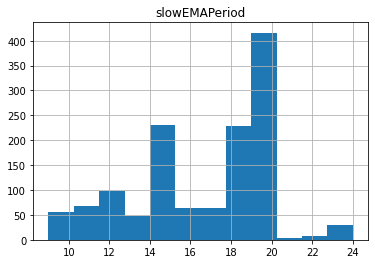

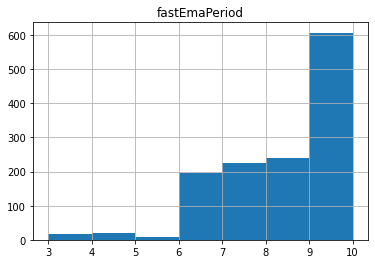

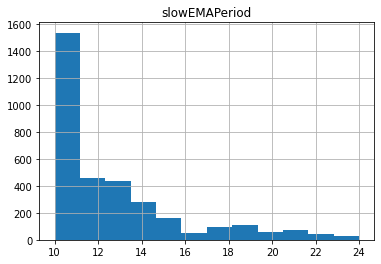

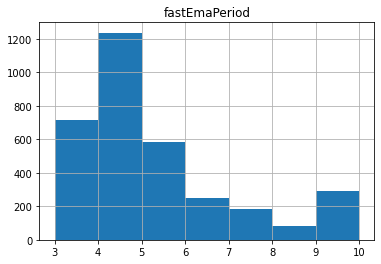

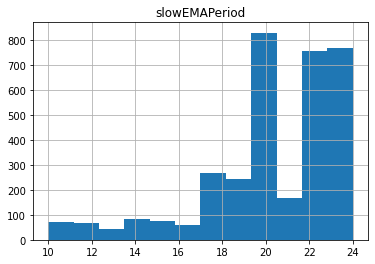

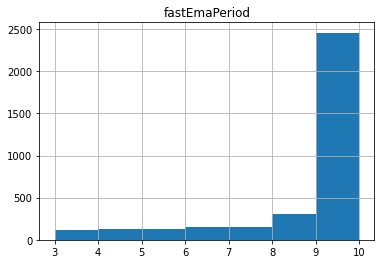

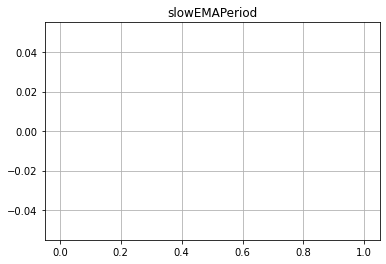

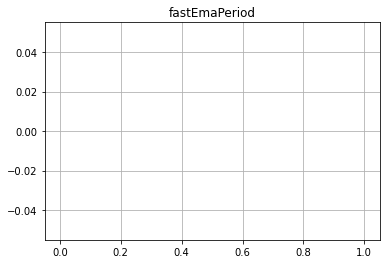

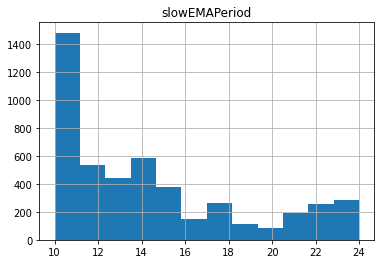

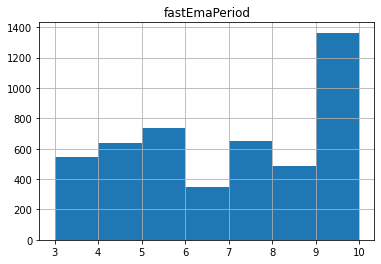

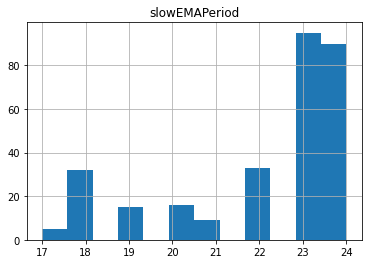

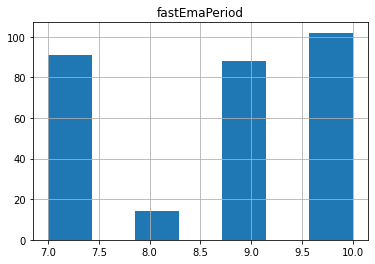

In [ ]:
print("W41")
DataFrameList[0].hist("slowEMAPeriod",bins=12)
DataFrameList[0].hist("fastEmaPeriod",bins=7)
print("W42")
DataFrameList[1].hist("slowEMAPeriod",bins=12)
DataFrameList[1].hist("fastEmaPeriod",bins=7)
print("W43")
DataFrameList[2].hist("slowEMAPeriod",bins=12)
DataFrameList[2].hist("fastEmaPeriod",bins=7)
print("W44")
DataFrameList[3].hist("slowEMAPeriod",bins=12)
DataFrameList[3].hist("fastEmaPeriod",bins=7)
print("W45")
DataFrameList[4].hist("slowEMAPeriod",bins=12)
DataFrameList[4].hist("fastEmaPeriod",bins=7)
print("W46")
DataFrameList[5].hist("slowEMAPeriod",bins=12)
DataFrameList[5].hist("fastEmaPeriod",bins=7)

In [ ]:
DataFrameList[1].columns

Index(['Result', 'Expected Payoff', 'Profit Factor', 'Recovery Factor',
       'Sharpe Ratio', 'Equity DD %', 'Trades', 'SlFactor', 'TpFactor',
       'atrPeriod', 'delta', 'option', 'fastEmaPeriod', 'slowEMAPeriod',
       'vwapZoneMultiplyer', 'RR ratio'],
      dtype='object')

In [ ]:
DataFrameList[2].groupby(["fastEmaPeriod","slowEMAPeriod"]).get_group((10,20)).sort_values("Profit")

,Result,Profit,Expected Payoff,Profit Factor,Recovery Factor,Sharpe Ratio,Equity DD %,Trades,SlFactor,TpFactor,atrPeriod,delta,option,fastEmaPeriod,slowEMAPeriod,vwapZoneMultiplyer,RR ratio,Profit %
Pass,,,,,,,,,,,,,,,,,,
651,1.99,758.10,47.381250,0.000000,1.993112,25.569568,3.6373,16,5.0,2.3,24,0.33,0,10,20,2,0.460000,7.5810
776,1.99,758.10,47.381250,0.000000,1.993112,25.569568,3.6373,16,5.0,2.3,24,0.18,2,10,20,2,0.460000,7.5810
1177,2.21,964.65,68.903571,0.000000,2.209308,12.245786,4.1557,14,4.5,3.0,14,0.35,0,10,20,2,0.666667,9.6465
1373,1.45,971.55,35.983333,3.197580,1.454808,34.502796,6.1965,27,2.4,1.4,22,0.39,1,10,20,2,0.583333,9.7155
1088,2.40,996.40,62.275000,0.000000,2.397325,15.861870,3.9415,16,5.0,3.0,14,0.23,1,10,20,4,0.600000,9.9640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,4.62,4427.86,170.302308,21.775395,4.623431,29.288317,8.7463,26,2.4,8.4,25,0.50,0,10,20,9,3.500000,44.2786
3567,5.55,4486.37,203.925909,0.000000,5.546740,27.081321,7.5255,22,2.6,9.5,25,0.21,1,10,20,9,3.653846,44.8637
3759,5.56,4493.83,204.265000,0.000000,5.555964,26.887113,7.5255,22,2.6,9.5,25,0.21,1,10,20,10,3.653846,44.9383


In [ ]:
DataFrameList[3]

,Result,Profit,Expected Payoff,Profit Factor,Recovery Factor,Sharpe Ratio,Equity DD %,Trades,SlFactor,TpFactor,atrPeriod,delta,option,fastEmaPeriod,slowEMAPeriod,vwapZoneMultiplyer,RR ratio,Profit %
Pass,,,,,,,,,,,,,,,,,,
3941,0.98,769.44,3.578791,1.295465,0.981016,8.261754,7.0286,215,5.0,2.6,15,0.07,1,3,14,7,0.520000,7.6944
3978,0.97,811.09,3.772512,1.291540,0.966700,8.182992,7.4701,215,4.7,2.6,15,0.07,1,3,14,7,0.553191,8.1109
3996,0.96,748.46,3.341339,1.279354,0.963207,8.520222,6.9848,224,4.9,2.3,14,0.07,1,3,14,7,0.469388,7.4846
3911,0.96,729.72,3.257679,1.278406,0.959905,8.486572,6.8490,224,5.0,2.3,14,0.07,1,3,14,7,0.460000,7.2972
3608,0.96,790.75,3.677907,1.290511,0.959171,8.137622,7.3599,215,4.8,2.6,15,0.07,1,3,14,7,0.541667,7.9075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,0.00,0.00,0.000000,NaN,0.000000,0.000000,0.0000,0,4.2,6.0,18,0.06,2,10,10,4,1.428571,0.0000
363,0.00,0.00,0.000000,NaN,0.000000,0.000000,0.0000,0,1.5,8.2,23,0.22,0,10,10,7,5.466667,0.0000
247,0.00,0.00,0.000000,NaN,0.000000,0.000000,0.0000,0,0.8,1.4,18,0.07,2,10,10,4,1.750000,0.0000
